# Import Data

In [79]:
import numpy as np
import pandas as pd

In [80]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df = pd.read_csv(boston_url)

# About Dataset

In [81]:
df.sample(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
392,392,11.57790,0.0,18.10,0.0,0.700,5.036,97.0,1.7700,24.0,666.0,20.2,25.68,9.7
161,161,1.46336,0.0,19.58,0.0,0.605,7.489,90.8,1.9709,5.0,403.0,14.7,1.73,50.0
57,57,0.01432,100.0,1.32,0.0,0.411,6.816,40.5,8.3248,5.0,256.0,15.1,3.95,31.6
83,83,0.03551,25.0,4.86,0.0,0.426,6.167,46.7,5.4007,4.0,281.0,19.0,7.51,22.9
251,251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,3.59,24.8


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


### Describe
    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner- occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per 10,000(USD)
    PTRATIO - pupil-teacher ratio by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's

# Visualizations and Descriptive

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

### Boxplot of the Median value of owner-occupied homes

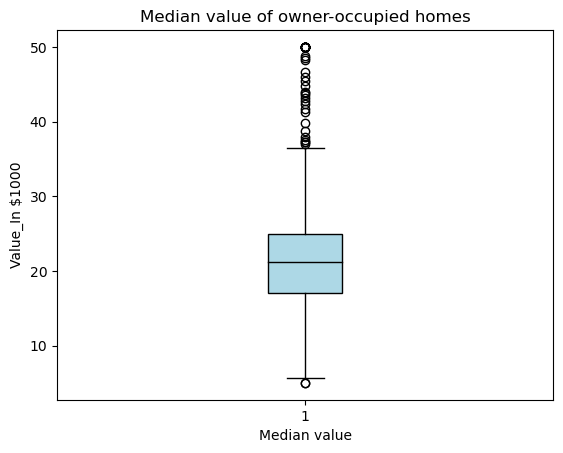

In [84]:
plt.boxplot(df['MEDV'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='black'))
plt.xlabel('Median value')
plt.ylabel('Value_In $1000')
plt.title('Median value of owner-occupied homes')
plt.show()

### Bar plot of the Charles river variable

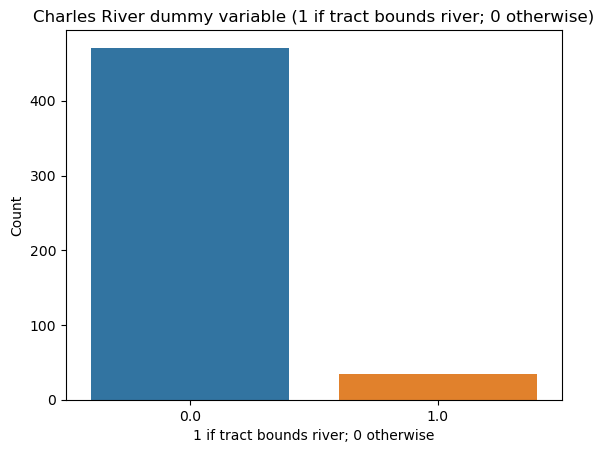

In [85]:
categories = [0, 1]
sns.countplot(x = df['CHAS'])
plt.xlabel('1 if tract bounds river; 0 otherwise')
plt.ylabel('Count')
plt.title('Charles River dummy variable (1 if tract bounds river; 0 otherwise)')
plt.show()

### Boxplot for the MEDV variable vs the AGE variable.

In [86]:
# Separate Age in to 3 groups
df.loc[df['AGE'] <= 35, 'Age_Group'] = '35 years and younger'
df.loc[(df['AGE'] > 35) & (df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
df.loc[df['AGE'] >= 70, 'Age_Group'] = '70 years and older'
df.sample(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group
336,336,0.03427,0.0,5.19,0.0,0.515,5.869,46.3,5.2311,5.0,224.0,20.2,9.80,19.5,between 35 and 70 years
352,352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,7.79,18.6,35 years and younger
127,127,0.25915,0.0,21.89,0.0,0.624,5.693,96.0,1.7883,4.0,437.0,21.2,17.19,16.2,70 years and older
256,256,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,3.11,44.0,35 years and younger
222,222,0.62356,0.0,6.20,1.0,0.507,6.879,77.7,3.2721,8.0,307.0,17.4,9.93,27.5,70 years and older


In [87]:
g1 = df['AGE'][df['Age_Group'] == '35 years and younger']
g2 = df['AGE'][df['Age_Group'] == 'between 35 and 70 years']
g3 = df['AGE'][df['Age_Group'] == '70 years and older']
gp1 = [e for e in df['MEDV'] if e in g1]
gp2 = [e for e in df['MEDV'] if e in g2]
gp3 = [e for e in df['MEDV'] if e in g3]

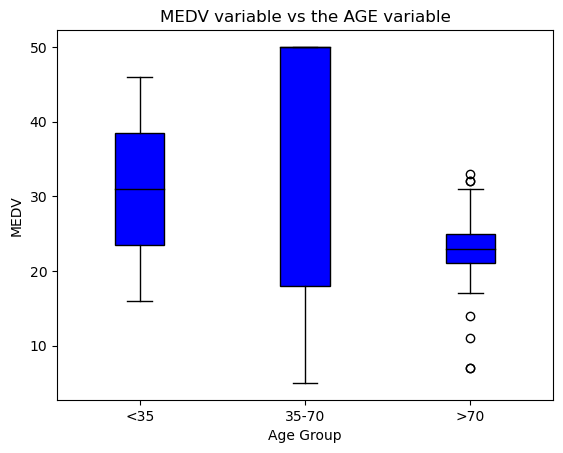

In [88]:
plt.boxplot([gp1, gp2, gp3], labels=['<35', '35-70', '>70'], patch_artist=True, 
            boxprops = dict(facecolor='blue', color='black'),
            medianprops = dict(color='black'))
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.title('MEDV variable vs the AGE variable')
plt.show()

### Scatter plot of Nitric oxide concentrations and the proportion of non-retail business acres per town

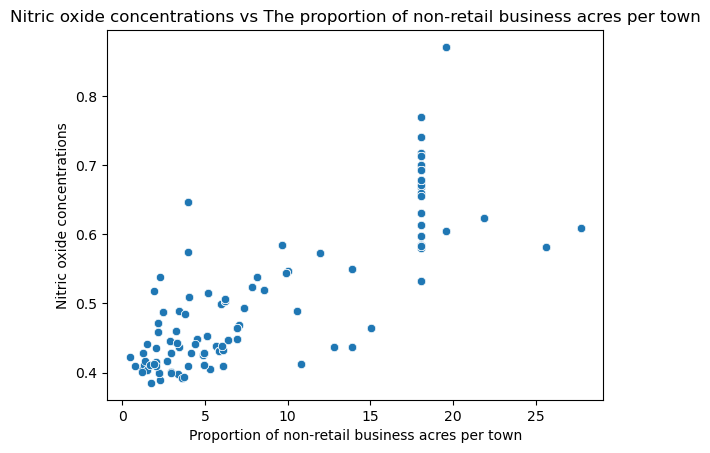

In [89]:
sns.scatterplot(x='INDUS', y='NOX', data = df)
plt.xlabel('Proportion of non-retail business acres per town')
plt.ylabel('Nitric oxide concentrations')
plt.title('Nitric oxide concentrations vs The proportion of non-retail business acres per town')
plt.show()

##### Data insights
We can see that there is a lot of data point at low value of 2 variable.
It's mean low proportion of non-retail business acres per town  create low NOX 
and high proportion of non-retail business acres per town create high NOX.

### Histogram of the pupil to teacher ratio variable

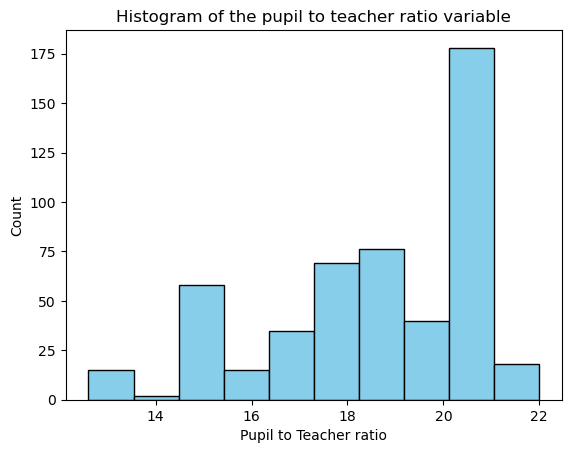

In [90]:
plt.hist(df['PTRATIO'], color='skyblue', edgecolor='black')
plt.xlabel('Pupil to Teacher ratio')
plt.ylabel('Count')
plt.title('Histogram of the pupil to teacher ratio variable')
plt.show()

# Task
    1. Is there a significant difference in the median value of houses bounded by the Charles river or not?

       Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

    2. Can we conclude that there is no relationship between Nitric oxide concentrations 
       and the proportion of non-retail business acres per town?

    3. What is the impact of an additional weighted distance to the five Boston employment centres on 
       the median value of owner-occupied homes?

## 1.1 Is there a significant difference in the median value of houses bounded by the Charles river or not?
    Using T-test (bc. this is the Sample independece data)
    State the hypotheses:
        H0: The median of bounded house and not bounded house aren't difference
        Ha: The median of bounded house and not bounded house are difference
    Set the a = 5% or 0.05

In [91]:
df.sample(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group
11,11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,13.27,18.9,70 years and older
254,254,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,6.57,21.9,35 years and younger
43,43,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,7.44,24.7,35 years and younger
321,321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,6.87,23.1,between 35 and 70 years
471,471,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,12.87,19.6,70 years and older


In [92]:
# Groups the bounded house and not bounded house by the Charles river
medv_bounded = df['MEDV'][df['CHAS'] == 1]
medv_notbounded = df['MEDV'][df['CHAS'] == 0]

In [93]:
# Checking that 2 sample has the equal variance or not by using Levene test
import scipy.stats as scp
scp.levene(medv_bounded, medv_notbounded)

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [94]:
# Run T-test with assumption of equal_var = False
scp.ttest_ind(medv_bounded, medv_notbounded, equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

### Result of testing
    as we can see the p-value is 0.0036 which less than a = 0.05, thus we reject null hypothesis
    then the result is The median of bounded house and not bounded house are difference

## 1.2 Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
    Using ANOVA (bc. there are 3 groups of sample)
    State the hypotheses:
        H0: The mean of every group is the same.(significant difference in the median value)
        Ha: There is at least mean of 1 group that is not the same as others.(no significant difference in the median value)
    Set the a = 5% or 0.05   

In [95]:
# We already have 3 groups of MEDV separated by AGE
scp.f_oneway(gp1, gp2, gp3)

F_onewayResult(statistic=10.92392697625259, pvalue=7.430463971962245e-05)

### Result of testing
    as we can see the p-value is less than alpha, thus we reject null hypothesis
    It's mean no significant difference in the median value

## 2. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
    Using Peason Correlation test
    State the hypotheses:
        H0: There is no significant correlation. between these 2 groups.
        Ha: There is significant correlation.between these 2 groups.
    Set the a = 5% or 0.05   

In [96]:
df.sample(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group
362,362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,10.19,20.8,70 years and older
102,102,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5.0,384.0,20.9,10.63,18.6,70 years and older
141,141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,34.41,14.4,70 years and older
156,156,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5.0,403.0,14.7,16.14,13.1,70 years and older
99,99,0.06860,0.0,2.89,0.0,0.445,7.416,62.5,3.4952,2.0,276.0,18.0,6.19,33.2,between 35 and 70 years


In [97]:
scp.pearsonr(df['NOX'], df['INDUS'])

PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061232958e-98)

### Result of testing¶
    as we can see the p-value is less than alpha, thus we reject null hypothesis.
    It's mean There is significant correlation.between these 2 groups.

## 3. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied home
    Using Regression Analysis
    x is DIS
    y is MEDV

In [98]:
import statsmodels.api as sm
x = df['DIS']
y = df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        17:10:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Result
    the DIS coef. 1.092 means the MEDV incress if 1.092*DIS